In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from matplotlib import pyplot
from keras.models import model_from_json

2023-12-11 10:23:26.316497: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-11 10:23:26.316601: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-11 10:23:26.377356: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-11 10:23:28.135265: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/usr/lib/python3/dist-packages/requests/__init__.py:87: RequestsDependencyWarning: urllib3 (2.1.0) or chardet (5.2.0) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [2]:
(train_x, train_y), (test_x, test_y) = keras.datasets.mnist.load_data()
train_x = train_x / 255.0
test_x = test_x / 255.0
train_x.shape

(60000, 28, 28)

In [3]:
train_x = tf.expand_dims(train_x, 3)
test_x = tf.expand_dims(test_x, 3)
val_x = train_x[:5000]
val_y = train_y[:5000]
train_x.shape

2023-12-11 10:23:30.603557: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-11 10:23:30.855339: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-11 10:23:30.855615: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

TensorShape([60000, 28, 28, 1])

In [4]:
lenet_5_model = keras.models.Sequential([
    keras.layers.Conv2D(6, kernel_size=5, strides=1,  activation='tanh', input_shape=train_x[0].shape, padding='same'), #C1
    keras.layers.AveragePooling2D(), #S2
    keras.layers.Conv2D(16, kernel_size=5, strides=1, activation='tanh', padding='valid'), #C3
    keras.layers.AveragePooling2D(), #S4
    keras.layers.Flatten(), #Flatten
    keras.layers.Dense(120, activation='tanh'), #C5
    keras.layers.Dense(84, activation='tanh'), #F6
    keras.layers.Dense(10, activation='softmax') #Output layer
])

In [5]:
lenet_5_model.compile(optimizer='adam',loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [16]:

lenet_5_model.fit(train_x, train_y, epochs=5, validation_data=(val_x, val_y))


Epoch 1/5


2023-12-11 10:37:53.847784: W external/local_xla/xla/service/gpu/llvm_gpu_backend/gpu_backend_lib.cc:542] libdevice is required by this HLO module but was not found at ./libdevice.10.bc
2023-12-11 10:37:53.849283: W tensorflow/core/framework/op_kernel.cc:1839] OP_REQUIRES failed at xla_ops.cc:574 : INTERNAL: libdevice not found at ./libdevice.10.bc
2023-12-11 10:37:53.883013: W external/local_xla/xla/service/gpu/llvm_gpu_backend/gpu_backend_lib.cc:542] libdevice is required by this HLO module but was not found at ./libdevice.10.bc
2023-12-11 10:37:53.884541: W tensorflow/core/framework/op_kernel.cc:1839] OP_REQUIRES failed at xla_ops.cc:574 : INTERNAL: libdevice not found at ./libdevice.10.bc
2023-12-11 10:37:53.919242: W external/local_xla/xla/service/gpu/llvm_gpu_backend/gpu_backend_lib.cc:542] libdevice is required by this HLO module but was not found at ./libdevice.10.bc
2023-12-11 10:37:53.921245: W tensorflow/core/framework/op_kernel.cc:1839] OP_REQUIRES failed at xla_ops.cc:574 

InternalError: Graph execution error:

Detected at node Adam/StatefulPartitionedCall_8 defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/users/amindahi88/.local/lib/python3.10/site-packages/ipykernel_launcher.py", line 17, in <module>

  File "/users/amindahi88/.local/lib/python3.10/site-packages/traitlets/config/application.py", line 1053, in launch_instance

  File "/users/amindahi88/.local/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 737, in start

  File "/users/amindahi88/.local/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 195, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/users/amindahi88/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 524, in dispatch_queue

  File "/users/amindahi88/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 513, in process_one

  File "/users/amindahi88/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 418, in dispatch_shell

  File "/users/amindahi88/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 758, in execute_request

  File "/users/amindahi88/.local/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 426, in do_execute

  File "/users/amindahi88/.local/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 549, in run_cell

  File "/users/amindahi88/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3046, in run_cell

  File "/users/amindahi88/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3101, in _run_cell

  File "/users/amindahi88/.local/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner

  File "/users/amindahi88/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3306, in run_cell_async

  File "/users/amindahi88/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3488, in run_ast_nodes

  File "/users/amindahi88/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3548, in run_code

  File "/tmp/ipykernel_69555/478805210.py", line 4, in <module>

  File "/users/amindahi88/.local/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/users/amindahi88/.local/lib/python3.10/site-packages/keras/src/engine/training.py", line 1807, in fit

  File "/users/amindahi88/.local/lib/python3.10/site-packages/keras/src/engine/training.py", line 1401, in train_function

  File "/users/amindahi88/.local/lib/python3.10/site-packages/keras/src/engine/training.py", line 1384, in step_function

  File "/users/amindahi88/.local/lib/python3.10/site-packages/keras/src/engine/training.py", line 1373, in run_step

  File "/users/amindahi88/.local/lib/python3.10/site-packages/keras/src/engine/training.py", line 1154, in train_step

  File "/users/amindahi88/.local/lib/python3.10/site-packages/keras/src/optimizers/optimizer.py", line 544, in minimize

  File "/users/amindahi88/.local/lib/python3.10/site-packages/keras/src/optimizers/optimizer.py", line 1223, in apply_gradients

  File "/users/amindahi88/.local/lib/python3.10/site-packages/keras/src/optimizers/optimizer.py", line 652, in apply_gradients

  File "/users/amindahi88/.local/lib/python3.10/site-packages/keras/src/optimizers/optimizer.py", line 1253, in _internal_apply_gradients

  File "/users/amindahi88/.local/lib/python3.10/site-packages/keras/src/optimizers/optimizer.py", line 1345, in _distributed_apply_gradients_fn

  File "/users/amindahi88/.local/lib/python3.10/site-packages/keras/src/optimizers/optimizer.py", line 1340, in apply_grad_to_update_var

libdevice not found at ./libdevice.10.bc
	 [[{{node Adam/StatefulPartitionedCall_8}}]] [Op:__inference_train_function_1319]

In [7]:
lenet_5_model.evaluate(test_x, test_y)

313/313 [==============================] - 2s 4ms/step - loss: 2.3259 - accuracy: 0.1033


[2.325939416885376, 0.10329999774694443]

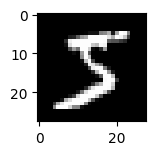

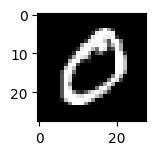

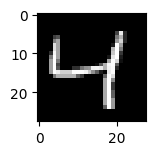

In [8]:
for i in range(3):  
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(train_x[i], cmap=pyplot.get_cmap('gray'))
    pyplot.show()

In [9]:
lenet_5_model.save('lenet_5_model')
print(os.listdir('lenet_5_model'))

INFO:tensorflow:Assets written to: lenet_5_model/assets


INFO:tensorflow:Assets written to: lenet_5_model/assets


['assets', 'fingerprint.pb', 'keras_metadata.pb', 'saved_model.pb', 'variables']


In [10]:
lenet_5_model.save("my.h5")

/users/amindahi88/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [11]:
lenet_5_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (Average  (None, 14, 14, 6)         0         
 Pooling2D)                                                      
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Avera  (None, 5, 5, 16)          0         
 gePooling2D)                                                    
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)               4

In [12]:
json_model = lenet_5_model.to_json()

In [13]:
with open('fashionmnist_model.json', 'w') as json_file:
    json_file.write(json_model)

In [14]:
lenet_5_model.save_weights('FashionMNIST_weights.h5')

In [15]:
lenet_5_model.layers[0].get_weights()[0]

array([[[[-0.11632455,  0.13479348, -0.01456213,  0.11957867,
          -0.13597453, -0.00716031]],

        [[ 0.16220392,  0.102152  ,  0.14305414, -0.11737873,
          -0.09197959, -0.10645687]],

        [[ 0.1443419 ,  0.01300381,  0.04143581, -0.09639649,
           0.12261291,  0.06268018]],

        [[ 0.11460204,  0.14036809, -0.17482503, -0.18313305,
           0.09811534,  0.15314497]],

        [[ 0.02804153, -0.00904642, -0.10779716,  0.07433368,
          -0.04376203, -0.18129034]]],


       [[[-0.12623942,  0.1051576 , -0.12878536,  0.03929745,
          -0.15723029, -0.18093117]],

        [[-0.13637291,  0.17341043, -0.17284966,  0.13481577,
          -0.11003234,  0.16697113]],

        [[ 0.06879644, -0.02303669,  0.01262873,  0.14912088,
           0.06190532,  0.0885704 ]],

        [[-0.07887826,  0.08702753, -0.14761293, -0.06043521,
          -0.05184905, -0.14467828]],

        [[-0.05979142,  0.13824345, -0.14947644,  0.05599049,
          -0.04022637,  0.1